# Simple example of LFP signal and bandpass filtering
### Produces Figures 1 and 5

**Figure 1.** Import the data, downsample, convert to milli/microvolt and plot.
<br>
**Figure 5.** Bandpass filter the data.

### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.io import loadmat
from scipy.signal import butter, filtfilt, sosfreqz

### Load data

In [2]:
x = loadmat('JBCA1ppDG_1-240615-SOR-open_field_egf2_ex.mat')
x = x['egf']
x = x.reshape(x.shape[0])
Fs = 4800

### Downsample

In [3]:
factor = 2
Fs = Fs/factor
x = scipy.signal.decimate(x, q=factor, zero_phase=True)

/Users/Andrew/anaconda/lib/python3.5/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/Users/Andrew/anaconda/lib/python3.5/site-packages/scipy/signal/signaltools.py:3424: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return y[sl]


### Convert signal to millivolts

In [4]:
adc_conv = 1500/1000                      # ADC_fullscale_mv 1500
gain = 2000                               # gain_ch_28 2000
max_int_val = 2**(2*8-1)                  # 2 byte integers
R = 10000                                 # 10kOhm attenuator (in 0_Protocol - CA1ppDG Extinction Study.rtf)
attenuation = (R + 2000) / 2000           # annenuation factor

factor = attenuation/max_int_val*adc_conv/gain;  # from mTintCore read_eeg_file.m
x = x*factor                                     # converts to volt
x = 1000*1000*x                                  # converts to microvolt

### Plot signal

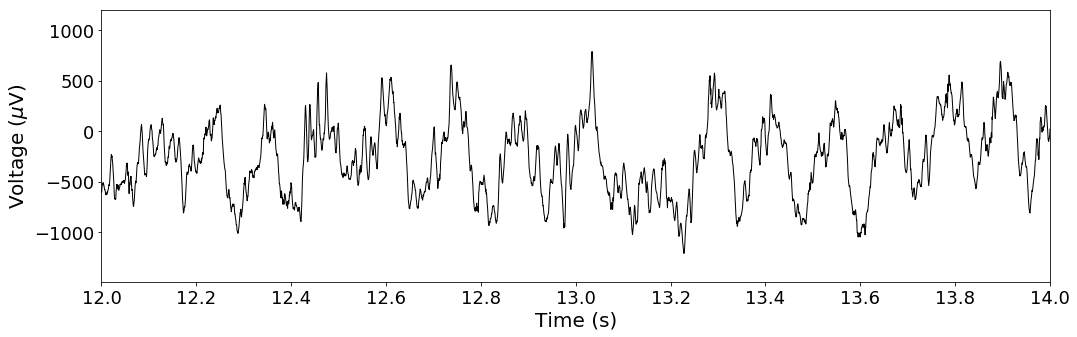

In [6]:
s1 = 12
s2 = 14
plt.figure(figsize=(17,5))
plt.plot(x, linewidth=1, color='black')
plt.xlim(s1*Fs, s2*Fs)
plt.xticks(np.linspace(Fs*s1,Fs*s2,11), np.round(np.linspace(s1,s2,11),1), fontsize=18)
plt.xlabel('Time (s)', fontsize=20)
plt.ylim(-1490, 1200)
plt.yticks(fontsize=18)
plt.ylabel('Voltage ($\mu$V)', fontsize=20)

plt.savefig('plots/ex_lfp_2sec.pdf', bbox_inches = "tight")
plt.show()

### Bandpass filtering

In [7]:
# function defintion from:
# https://scipy-cookbook.readthedocs.io/items/ButterworthBandpass.html

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

In [8]:
# first downsample again
factor = 6
Fs = Fs/factor
x = scipy.signal.decimate(x, q=factor, zero_phase=True)

# center
x = x - np.mean(x)

/Users/Andrew/anaconda/lib/python3.5/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/Users/Andrew/anaconda/lib/python3.5/site-packages/scipy/signal/signaltools.py:3424: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return y[sl]


In [9]:
x_filt = butter_bandpass_filter(x, lowcut=4, highcut=12, fs=Fs, order=6)

/Users/Andrew/anaconda/lib/python3.5/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


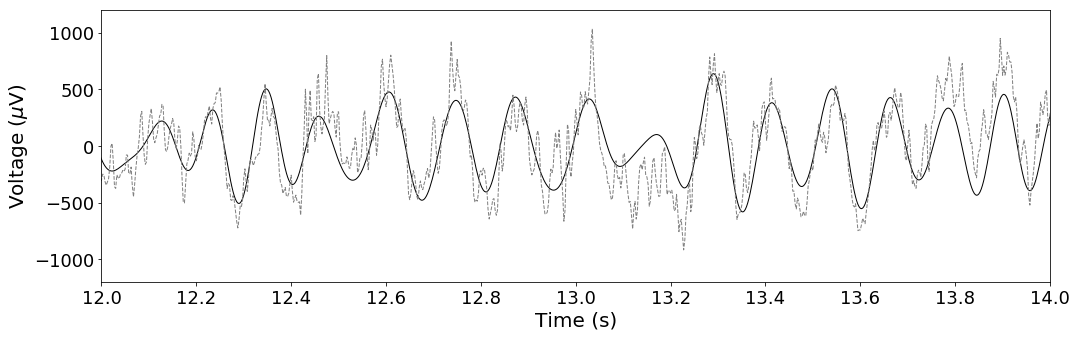

In [10]:
s1 = 12
s2 = 14
plt.figure(figsize=(17,5))
plt.plot(x_filt, linewidth=1, color='black')
plt.plot(x, linewidth=1, color='gray', linestyle='--')
plt.xlim(s1*Fs, s2*Fs)
plt.xticks(np.linspace(Fs*s1,Fs*s2,11), np.round(np.linspace(s1,s2,11),1), fontsize=18)
plt.xlabel('Time (s)', fontsize=20)
plt.ylim(-1200, 1200)
plt.yticks(fontsize=18)
plt.ylabel('Voltage ($\mu$V)', fontsize=20)

plt.savefig('plots/ch2-7-1_filterHilbert.pdf', bbox_inches = "tight")
plt.show()